In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 2020/1/13 16:28
# @Author  : Shark
# @Site    :
# @File    : tsts_trainer.py
# @Software: PyCharm

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "4"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# On CPU/GPU placement
config = tf.compat.v1.ConfigProto(allow_soft_placement=True, log_device_placement=True)
config.gpu_options.allow_growth = True
tf.compat.v1.Session(config=config)


2.0.0
Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:08:00.0, compute capability: 7.5



In [2]:
from kashgari.trainer.sampler_multi_task_trainer import SamplerMultiTaskTrainer
from kashgari.task import ReadabilityTask, NerTask, AlluSourceTask,AlluClassTask
from kashgari.processors import ClassificationProcessor, LabelingProcessor

poem_seq_len = 30
task_list = []



processor = LabelingProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
ner_task = NerTask(processor,
                   "./allusion_corpus",
                   poem_seq_len)
task_list.append(ner_task)


Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:08:00.0, compute capability: 7.5



I:LOAD NER CORPUS:[ner_task.p: 65]:loaded 21596 samples from ./allusion_corpus/train.data. Samples:
x[0]: ['纶', '綍', '谋', '猷', '盛', ',', '丹', '青', '步', '武', '亲', '。']
y[0]: ['B-ALLU', 'I-ALLU', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [ ]:
allu_def_seq_len = poem_seq_len
trainer = SamplerMultiTaskTrainer(task_list=task_list,
                                  batch_size=64,
                                  total_epochs=50,
                                  poem_seq_len=poem_seq_len,
                                  allu_def_seq_len=allu_def_seq_len)

final_res = trainer.train()


I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:0:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-04-13_18_52/0/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples


Epoch 1/50
230/230 [==============================] - 94s 410ms/step - task_name:     NER     - loss: 7.2535 - accuracy: 0.8090 - val_loss: 17.7448 - val_accuracy: 0.4741


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
230/230 [==============================] - 61s 266ms/step - task_name:     NER     - loss: 5.5957 - accuracy: 0.8291 - val_loss: 15.6214 - val_accuracy: 0.7570


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
230/230 [==============================] - 61s 267ms/step - task_name:     NER     - loss: 4.7185 - accuracy: 0.8397 - val_loss: 13.9075 - val_accuracy: 0.8148


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
230/230 [==============================] - 62s 269ms/step - task_name:     NER     - loss: 4.1578 - accuracy: 0.8438 - val_loss: 12.6079 - val_accuracy: 0.8291


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
230/230 [==============================] - 61s 265ms/step - task_name:     NER     - loss: 3.6692 - accuracy: 0.8477 - val_loss: 11.5726 - val_accuracy: 0.8272


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
230/230 [==============================] - 61s 265ms/step - task_name:     NER     - loss: 3.3110 - accuracy: 0.8510 - val_loss: 10.7864 - val_accuracy: 0.8302


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
230/230 [==============================] - 61s 265ms/step - task_name:     NER     - loss: 3.0622 - accuracy: 0.8527 - val_loss: 10.2254 - val_accuracy: 0.8191


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
230/230 [==============================] - 61s 265ms/step - task_name:     NER     - loss: 2.8300 - accuracy: 0.8562 - val_loss: 9.8283 - val_accuracy: 0.7402


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
230/230 [==============================] - 61s 265ms/step - task_name:     NER     - loss: 2.6620 - accuracy: 0.8570 - val_loss: 9.5162 - val_accuracy: 0.7296


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
230/230 [==============================] - 61s 266ms/step - task_name:     NER     - loss: 2.4903 - accuracy: 0.8622 - val_loss: 9.3038 - val_accuracy: 0.7117


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
230/230 [==============================] - 61s 266ms/step - task_name:     NER     - loss: 2.3545 - accuracy: 0.8635 - val_loss: 9.1309 - val_accuracy: 0.6912


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
230/230 [==============================] - 61s 266ms/step - task_name:     NER     - loss: 2.2370 - accuracy: 0.8662 - val_loss: 9.1192 - val_accuracy: 0.6694


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
230/230 [==============================] - 61s 267ms/step - task_name:     NER     - loss: 2.1269 - accuracy: 0.8696 - val_loss: 8.9900 - val_accuracy: 0.6460


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.819769 precision: 0.238295, recall: 0.249884, f1: 0.243952

           precision    recall  f1-score   support

     ALLU     0.2383    0.2499    0.2440      4318

micro avg     0.2383    0.2499    0.2440      4318
macro avg     0.2383    0.2499    0.2440      4318

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:谁 当 门 下 客 , 独 见 有 任 安 。
y_pred:O O O O O O O O O B-ALLU I-ALLU O
y_true:O O O O O O O O O B-ALLU I-ALLU O
----------
x_seq:镜 中 鸾 影 胡 威 去 , 剑 外 花 归 卫 玠 还 。
y_pred:O O O O B-ALLU I-ALLU O O O O O O O O O O
y_true:O O O O O O O O O O O O B-ALLU I-ALLU O O
----------
x_seq:颜 子 不 得 禄 , 谁 谓 天 道 平 。
y_pred:B-ALLU I-ALLU O O O O O O O O O O
y_true:B-ALLU O O O O O O O O O O O
----------
x_seq:花 萼 楼 南 大 合 乐 , 八 音 九 奏 鸾 来 仪 。
y_pred:O O O O O O O O O O O O O O O O
y_tr

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 0th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches


test_example:**************************************************
x_seq:尉 佗 虽 北 拜 , 太 史 尚 南 留 。
y_pred:B-ALLU I-ALLU O O O O O O O O O O
y_true:O O O O O O O B-ALLU I-ALLU I-ALLU O O
----------
x_seq:桂 折 因 同 时 , 莺 迁 各 异 年 。
y_pred:B-ALLU O O O O O O O O O O O
y_true:O O O O O O B-ALLU O O O O O
----------
x_seq:长 跪 读 书 心 暂 缓 , 短 章 投 我 曲 何 高 。
y_pred:O O O O O O O O O O O O O O O O
y_true:O O O O O O O O O O O O B-ALLU I-ALLU I-ALLU O
----------
x_seq:远 愧 尚 方 曾 赐 履 , 竟 非 吾 土 倦 登 楼 。
y_pred:O O O O O O O O O O O O O O O O
y_true:O O O O O B-ALLU I-ALLU O O O O O O O O O
----------
x_seq:素 服 三 川 化 , 乌 裘 十 上 还 。
y_pred:O O B-ALLU O O O B-ALLU I-ALLU O O O O
y_true:O O O O O O O O B-ALLU I-ALLU O O
----------
x_seq:应 须 枉 车 歇 , 为 我 访 荷 裳 。
y_pred:O O O O O O O O O B-ALLU I-ALLU O
y_true:O O O O O O O O O B-ALLU O O
----------
x_seq:莫 嫌 滴 沥 红 斑 少 , 恰 似 湘 妃 泪 尽 时 。
y_pred:O O O O O O O O O O B-ALLU O O O O O
y_true:O O O O O O O O O O B-ALLU I-ALLU I-ALLU O O O
----------
x_seq:自 是 湘 州 石 燕 飞 , 那

I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:1:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-04-13_18_52/1/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples


Epoch 1/50
230/230 [==============================] - 94s 409ms/step - task_name:     NER     - loss: 5.7377 - accuracy: 0.8112 - val_loss: 11.1720 - val_accuracy: 0.8252


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
230/230 [==============================] - 61s 266ms/step - task_name:     NER     - loss: 4.4866 - accuracy: 0.8274 - val_loss: 10.0343 - val_accuracy: 0.8344


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
230/230 [==============================] - 62s 270ms/step - task_name:     NER     - loss: 3.9017 - accuracy: 0.8336 - val_loss: 9.2927 - val_accuracy: 0.8419


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
230/230 [==============================] - 61s 266ms/step - task_name:     NER     - loss: 3.4966 - accuracy: 0.8383 - val_loss: 8.7805 - val_accuracy: 0.8408


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
230/230 [==============================] - 61s 267ms/step - task_name:     NER     - loss: 3.2537 - accuracy: 0.8387 - val_loss: 8.4693 - val_accuracy: 0.8361


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
230/230 [==============================] - 63s 276ms/step - task_name:     NER     - loss: 3.0078 - accuracy: 0.8410 - val_loss: 8.2424 - val_accuracy: 0.8112


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
230/230 [==============================] - 64s 277ms/step - task_name:     NER     - loss: 2.7973 - accuracy: 0.8438 - val_loss: 8.0786 - val_accuracy: 0.8097


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
230/230 [==============================] - 64s 279ms/step - task_name:     NER     - loss: 2.6369 - accuracy: 0.8468 - val_loss: 8.0172 - val_accuracy: 0.8091


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
230/230 [==============================] - 61s 266ms/step - task_name:     NER     - loss: 2.5122 - accuracy: 0.8478 - val_loss: 7.9662 - val_accuracy: 0.8100


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
230/230 [==============================] - 62s 269ms/step - task_name:     NER     - loss: 2.4691 - accuracy: 0.8471 - val_loss: 7.8530 - val_accuracy: 0.8139


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.832277 precision: 0.485284, recall: 0.320750, f1: 0.386224

           precision    recall  f1-score   support

     ALLU     0.4856    0.3208    0.3863      4318

micro avg     0.4853    0.3208    0.3862      4318
macro avg     0.4856    0.3208    0.3863      4318

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:楚 臣 伤 江 枫 , 谢 客 拾 海 月 。
y_pred:O O O O O O O O O O O O
y_true:B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O
----------
x_seq:椒 兰 共 妒 忌 , 绛 灌 共 谗 谄 。
y_pred:B-ALLU I-ALLU O O O O B-ALLU I-ALLU O O O O
y_true:B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O
----------
x_seq:金 谷 走 车 来 , 玉 人 骑 马 待 。
y_pred:B-ALLU I-ALLU O O O O O O O O O O
y_true:B-ALLU I-ALLU O O O O O O O O O O
----------
x_seq:色 向 怀 铅 白 , 光 因 翰 简 融 。
y_pred:O O B-ALLU I-ALLU O O O O O O O O

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 1th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches


test_example:**************************************************
x_seq:身 犹 纳 履 误 , 情 为 覆 盆 伤 。
y_pred:O O O O O O O O B-ALLU I-ALLU O O
y_true:O O O O O O O O B-ALLU I-ALLU O O
----------
x_seq:吴 练 已 知 随 影 没 , 朔 风 犹 想 带 嘶 闻 。
y_pred:O O O O O O O O O O O O O O O O
y_true:B-ALLU I-ALLU O O O O O O O O O O O O O O
----------
x_seq:蟠 木 为 我 身 , 始 得 全 天 年 。
y_pred:B-ALLU I-ALLU O O O O O O O O O O
y_true:B-ALLU I-ALLU O O O O O O O O O O
----------
x_seq:处 处 汀 洲 有 芳 草 , 王 孙 [UNK] 肯 念 归 期 。
y_pred:O O O O O O O O B-ALLU I-ALLU O O O O O O
y_true:O O O O O O B-ALLU I-ALLU I-ALLU O O O O O O O
----------
x_seq:始 见 田 窦 相 移 夺 , 俄 闻 卫 霍 有 功 勋 。
y_pred:O O O O O O O O O O B-ALLU I-ALLU O O O O
y_true:O O B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O O O
----------
x_seq:空 夜 露 残 惊 堕 羽 , 辽 天 秋 晚 忆 归 程 。
y_pred:O O O O O O O O O O O O O O O O
y_true:O O O O O O O O B-ALLU O O O O O O O
----------
x_seq:潘 岳 叙 年 因 鬓 发 , 扬 雄 托 谏 在 文 章 。
y_pred:O O O O O O O O O O O O O O O O
y_true:O O O O O O O O B-A

I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:2:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-04-13_18_52/2/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples


Epoch 1/50
230/230 [==============================] - 93s 405ms/step - task_name:     NER     - loss: 6.3835 - accuracy: 0.8083 - val_loss: 15.9314 - val_accuracy: 0.7935


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
230/230 [==============================] - 63s 273ms/step - task_name:     NER     - loss: 4.7565 - accuracy: 0.8300 - val_loss: 14.2436 - val_accuracy: 0.8076


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
230/230 [==============================] - 62s 271ms/step - task_name:     NER     - loss: 4.0652 - accuracy: 0.8371 - val_loss: 12.9905 - val_accuracy: 0.8245


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
230/230 [==============================] - 62s 269ms/step - task_name:     NER     - loss: 3.6204 - accuracy: 0.8411 - val_loss: 11.9910 - val_accuracy: 0.8334


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
230/230 [==============================] - 61s 267ms/step - task_name:     NER     - loss: 3.2807 - accuracy: 0.8436 - val_loss: 11.2672 - val_accuracy: 0.8299


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
230/230 [==============================] - 63s 275ms/step - task_name:     NER     - loss: 3.0199 - accuracy: 0.8459 - val_loss: 10.7067 - val_accuracy: 0.8279


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
230/230 [==============================] - 67s 291ms/step - task_name:     NER     - loss: 2.8181 - accuracy: 0.8466 - val_loss: 10.2580 - val_accuracy: 0.8295


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
230/230 [==============================] - 72s 311ms/step - task_name:     NER     - loss: 2.6384 - accuracy: 0.8500 - val_loss: 9.8974 - val_accuracy: 0.8270


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
 46/230 [=====>........................] - ETA: 52s - task_name:     NER     - loss: 2.8062 - accuracy: 0.8552

In [ ]:
from kashgari.utils import compute_mean_metrics
from kashgari.utils import plot_final_res

In [ ]:
compute_mean_metrics(final_res)
plot_final_res(final_res)

NER	[0.82531813 0.35374482 0.25786169 0.29477445]


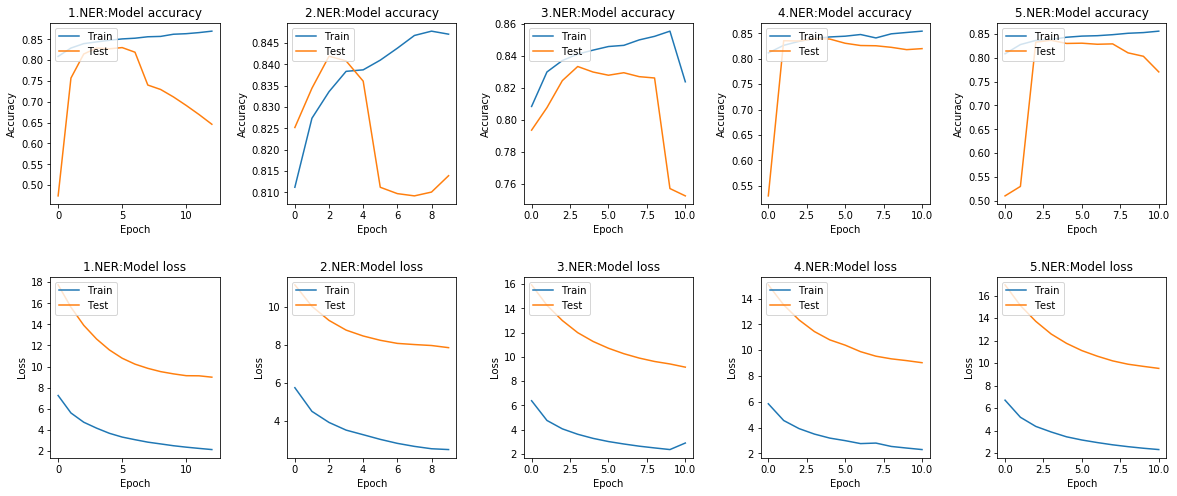

In [6]:
compute_mean_metrics(final_res)
plot_final_res(final_res)